## Importing libraries

In [5]:
import pandas as pd

import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPool1D
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

## Load the dataset

In [2]:
df =  pd.read_csv('/content/Emotion_classify_Data.csv')

## EDA

In [3]:
# Display the first few rows of the DataFrame
df.head()



,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [10]:
# Check for missing values
print(df.isnull().sum())

Comment    0
Emotion    0
dtype: int64


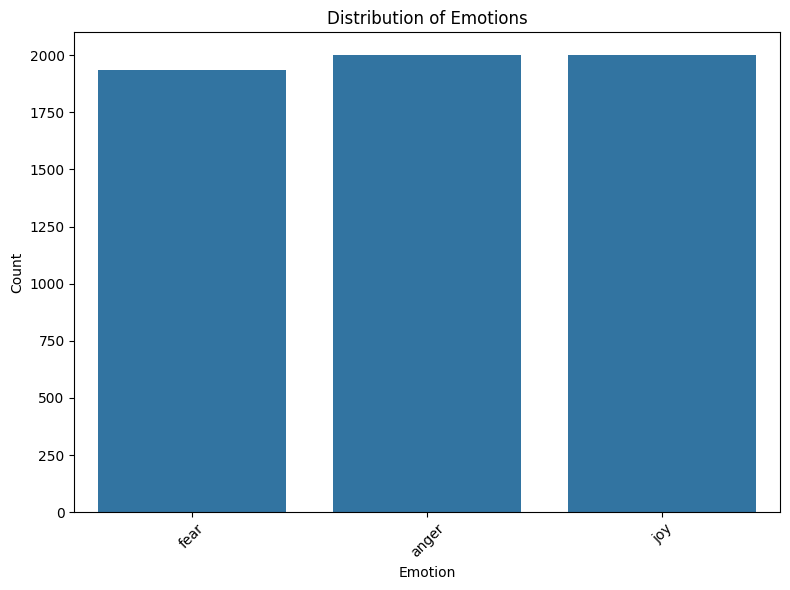

In [6]:
# Check the distribution of emotions
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Emotion')
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('emotion_distribution.png')  # Save the plot
plt.show()



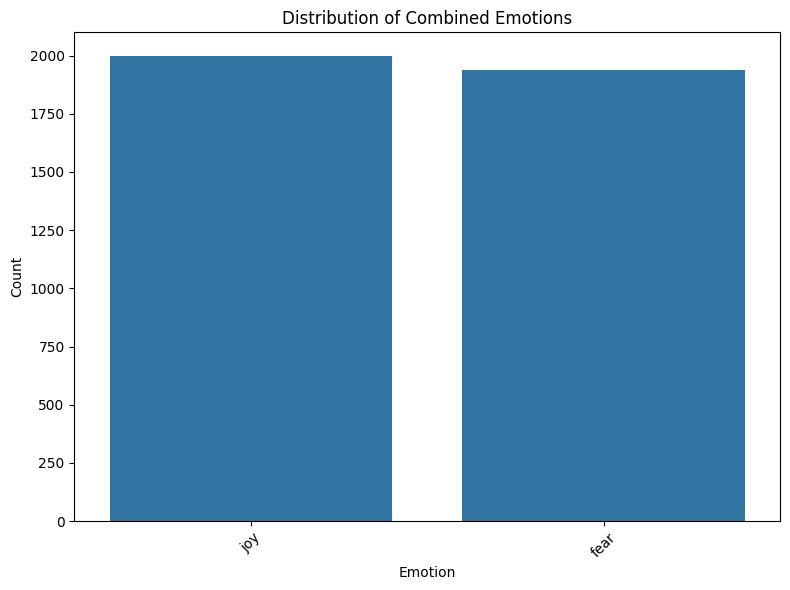

In [7]:
# Select a subset of data for joy and fear emotions
df_joy = df[df['Emotion'] == 'joy'].head(3000)
df_fear = df[df['Emotion'] == 'fear'].head(3000)

# Combine joy and fear data
df_combined = pd.concat([df_joy, df_fear])

# Display the combined data
plt.figure(figsize=(8, 6))
sns.countplot(data=df_combined, x='Emotion')
plt.title('Distribution of Combined Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('combined_emotion_distribution.png')  # Save the plot
plt.show()



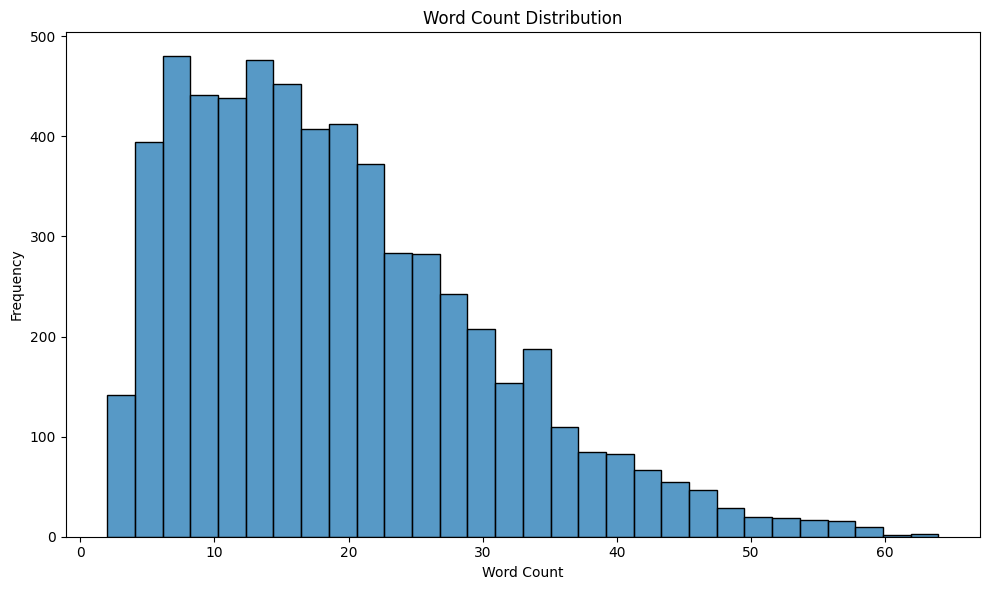

In [11]:
# Word count distribution
df['word_count'] = df['Comment'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='word_count', bins=30)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('Word_Count_distribution.png')  # Save the plot

plt.show()

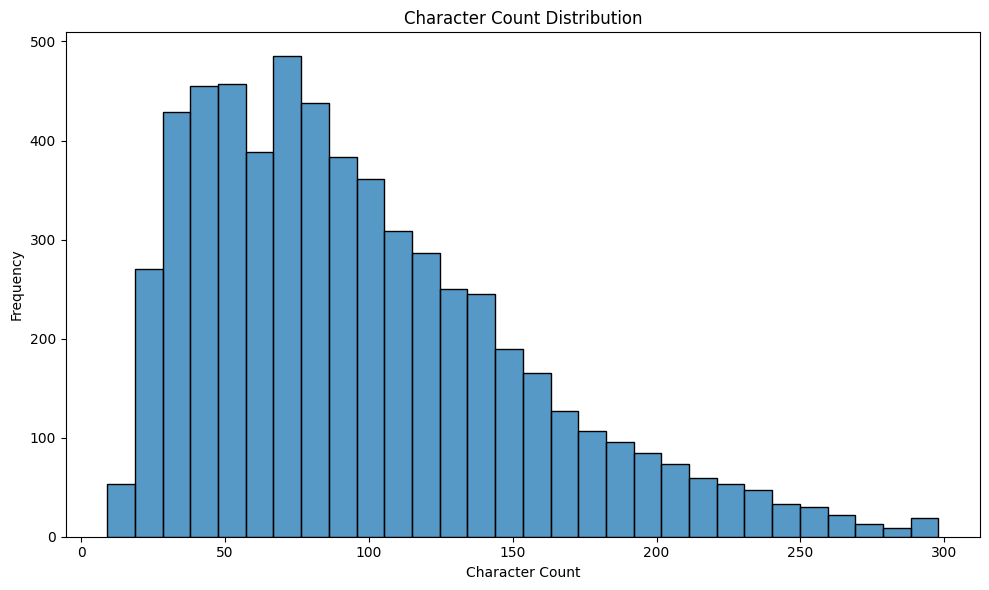

In [12]:
# Character count distribution
df['char_count'] = df['Comment'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='char_count', bins=30)
plt.title('Character Count Distribution')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('Character_Count_distribution.png')  # Save the plot

plt.show()

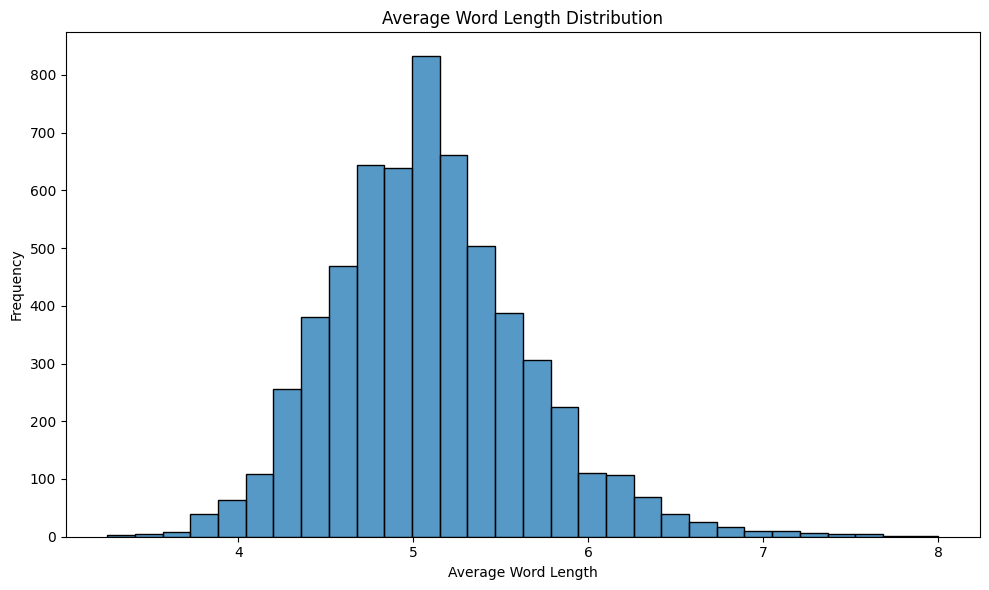

In [13]:
# Average word length distribution
df['avg_word_length'] = df['char_count'] / df['word_count']
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='avg_word_length', bins=30)
plt.title('Average Word Length Distribution')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('Average_Word_Length.png')  # Save the plot

plt.show()

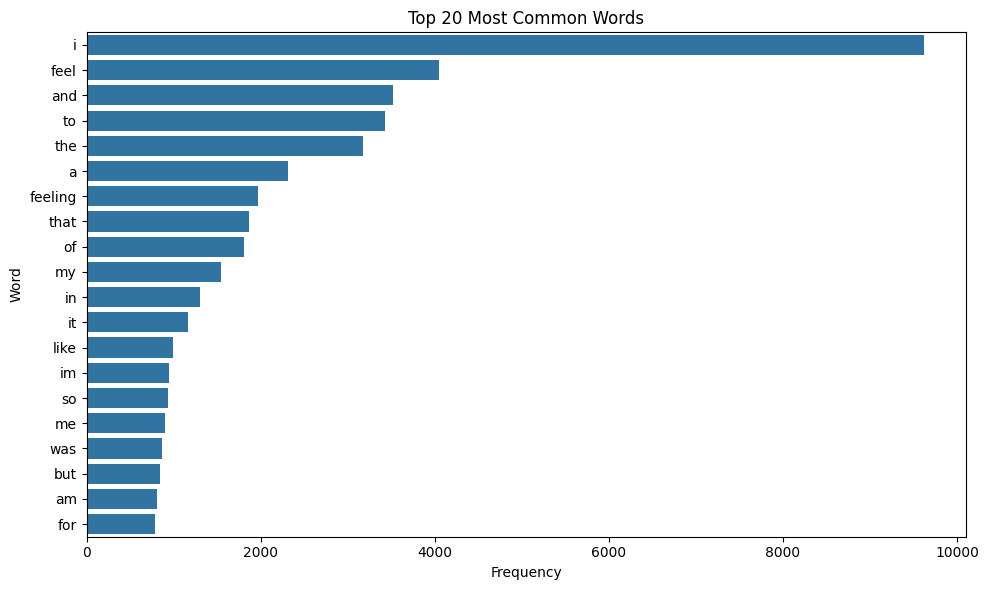

In [14]:
# Top 20 most common words
from collections import Counter
from nltk.tokenize import word_tokenize

all_words = ' '.join(df['Comment']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(data=common_words_df, x='Frequency', y='Word')
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.savefig('Top20_Common_words.png')  # Save the plot

plt.show()

# Preprocessing and tokenization

In [27]:
df_joy = df[df['Emotion'] == 'joy']

In [28]:
df_joy.shape

(2000, 5)

In [29]:
df_joy.iloc[:3000]

,Comment,Emotion,word_count,char_count,avg_word_length
3,ive been really angry with r and i feel like a...,joy,19,89,4.684211
9,i feel like i ve regained another vital part o...,joy,15,71,4.733333
10,i feel a bit like franz liebkind in the produc...,joy,22,110,5.000000
11,i was feeling at the start didnt want to move ...,joy,33,165,5.000000
13,i do not always find myself feeling thankful b...,joy,40,191,4.775000
...,...,...,...,...,...
5917,i feel re invigorated and full of ambition,joy,8,42,5.250000
5921,i feel instantly glamorous just pulling it out...,joy,19,98,5.157895
5922,i feel wonderful and i m very very grateful fo...,joy,13,63,4.846154
5931,i have lost touch with the things that i feel ...,joy,22,116,5.272727


In [30]:
df_joy = df_joy[['Emotion', 'Comment']]

In [31]:
df_joy = df_joy.iloc[:3000]

In [32]:
df_fear = df[df['Emotion'] == 'fear']

In [33]:
df_fear = df_fear.iloc[:3000]

In [34]:
df_joy.shape, df_fear.shape

((2000, 2), (1937, 5))

In [35]:
df_fear = df_fear[['Emotion', 'Comment']]

In [36]:
df_data = pd.concat([df_joy, df_fear])

In [37]:
df_data['Emotion'].value_counts()

Emotion
joy     2000
fear    1937
Name: count, dtype: int64

In [38]:
df_data['Emotion'] = df_data['Emotion'].replace({'joy': 1, 'fear': 0})

In [39]:
df_data.head()

,Emotion,Comment
3,1,ive been really angry with r and i feel like a...
9,1,i feel like i ve regained another vital part o...
10,1,i feel a bit like franz liebkind in the produc...
11,1,i was feeling at the start didnt want to move ...
13,1,i do not always find myself feeling thankful b...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Comment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Emotion']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Emotion'}, axis=1)
              .sort_values('Emotion', ascending=True))
  xs = counted['Emotion']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Emotion', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Comment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Comment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Emotion')
_ = plt.ylabel('count()')

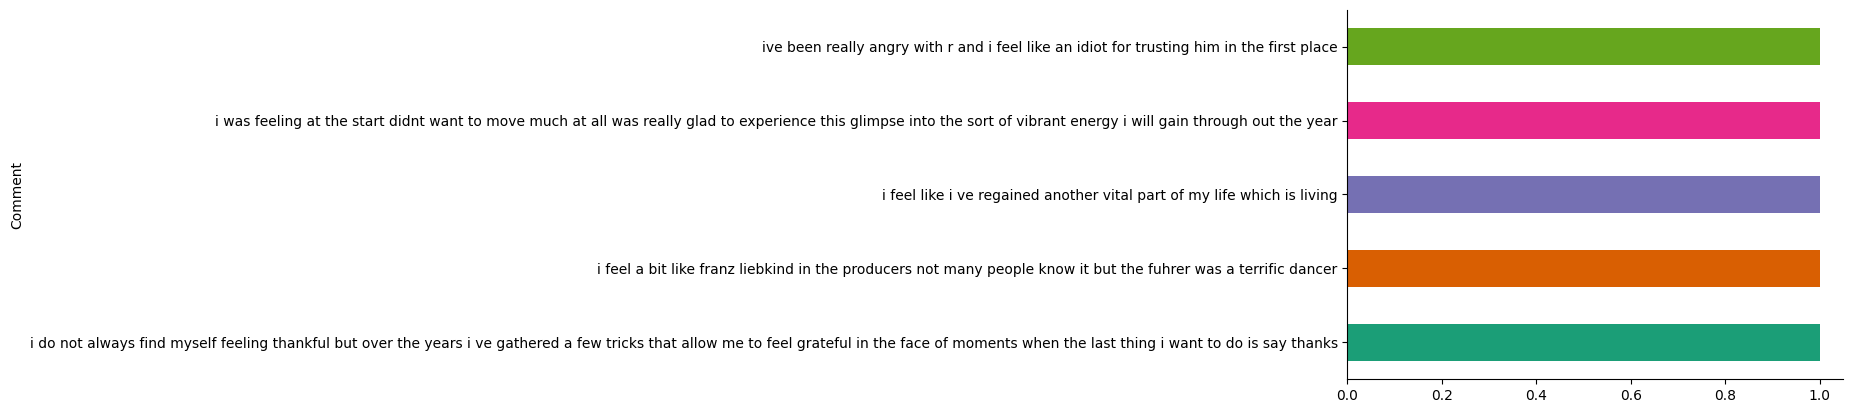

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Comment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [42]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [43]:
import re
from nltk.tokenize import word_tokenize



# Function to remove special characters using NLTK tokenizer and regular expressions
def remove_special_characters(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove special characters using regular expressions, keeping only alphanumeric characters
    clean_words = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in words]

    # Join the words back into a sentence
    clean_text = ' '.join(clean_words)
    return clean_text

# Apply the function to the 'text' column in the DataFrame
df_data['Comment'] = df_data['Comment'].apply(remove_special_characters)

In [44]:
df_data['Comment'] = df_data['Comment'].str.lower()

In [45]:
import pandas as pd
import numpy as np
import tensorflow as tf
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split


np.random.seed(42)
tf.random.set_seed(42)
X_train, X_test, y_train, y_test = train_test_split(df_data['Comment'], df_data['Emotion'], stratify = df_data['Emotion'], random_state=42)




In [47]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [48]:
# Preprocess the text data
stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)



In [49]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

# Pad the sequences to a fixed length
max_length = 100
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')



# Train the Word2Vec model
sentences = tokenizer.sequences_to_texts(X_train)  # Convert sequences back to texts
sentences = [sentence.split() for sentence in sentences]

w2v_model = Word2Vec(sentences, vector_size=200, window=10, min_count=3, workers=1)


# Create a weight matrix for the embedding layer
embedding_matrix = np.zeros((vocab_size,200))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]



# CNN Model

 **Convolutional Neural Network (CNN)**

1. **Embedding Layer**:
   - Converts input sequences into dense vectors of fixed size.
   - Parameters: `vocab_size` (vocabulary size), `200` (embedding dimensions), `embedding_matrix` (pre-trained embeddings), `max_length` (input length), `trainable=True` (allowing the embedding to be updated during training).

2. **First Convolutional Layer**:
   - `Conv1D(128, 5, activation='relu')`: Applies 128 filters of size 5 with ReLU activation.

3. **First Pooling Layer**:
   - `MaxPooling1D(5)`: Reduces the dimensionality by taking the maximum value over a window of size 5.

4. **Second Convolutional Layer**:
   - `Conv1D(128, 5, activation='relu')`: Applies another set of 128 filters of size 5 with ReLU activation.

5. **Second Pooling Layer**:
   - `MaxPooling1D(5)`: Further reduces dimensionality with another window of size 5.

6. **Flatten Layer**:
   - Converts the 2D matrix to a 1D vector.

7. **Dense Layers**:
   - `Dense(256, activation='relu')`: Fully connected layer with 256 neurons and ReLU activation.
   - `Dense(128, activation='relu')`: Fully connected layer with 128 neurons and ReLU activation.

8. **Output Layer**:
   - `Dense(1, activation='sigmoid')`: Output layer with a single neuron and sigmoid activation for binary classification.

9. **Compilation**:
   - `model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])`: Compiles the model with the Adam optimizer, binary cross-entropy loss, and accuracy metric.

In [50]:
# Define the CNN model
model = Sequential()
model.add(Embedding(vocab_size, 200, weights=[embedding_matrix], input_length=max_length, trainable=True))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [51]:
# Fit the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/30
93/93 [==============================] - 20s 133ms/step - loss: 0.6925 - accuracy: 0.5254 - val_loss: 0.6713 - val_accuracy: 0.5990
Epoch 2/30
93/93 [==============================] - 6s 66ms/step - loss: 0.3508 - accuracy: 0.8354 - val_loss: 0.2648 - val_accuracy: 0.8893
Epoch 3/30
93/93 [==============================] - 3s 30ms/step - loss: 0.0408 - accuracy: 0.9878 - val_loss: 0.1875 - val_accuracy: 0.9299
Epoch 4/30
93/93 [==============================] - 2s 17ms/step - loss: 0.0107 - accuracy: 0.9973 - val_loss: 0.2038 - val_accuracy: 0.9350
Epoch 5/30
93/93 [==============================] - 2s 25ms/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.1517 - val_accuracy: 0.9574
Epoch 6/30
93/93 [==============================] - 2s 18ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.1298 - val_accuracy: 0.9604
Epoch 7/30
93/93 [==============================] - 1s 16ms/step - loss: 7.9959e-04 - accuracy: 0.9997 - val_loss: 0.1334 - val_accuracy: 0.9635
Epoch 8

In [52]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Accuracy on test data: {accuracy * 100:.2f}%')

31/31 [==============================] - 0s 3ms/step - loss: 0.2266 - accuracy: 0.9594
Accuracy on test data: 95.94%


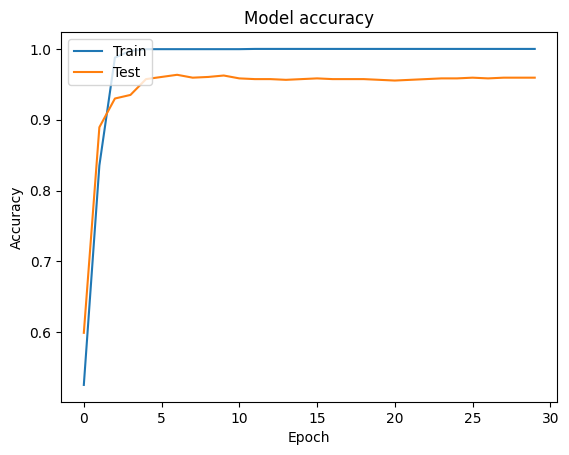

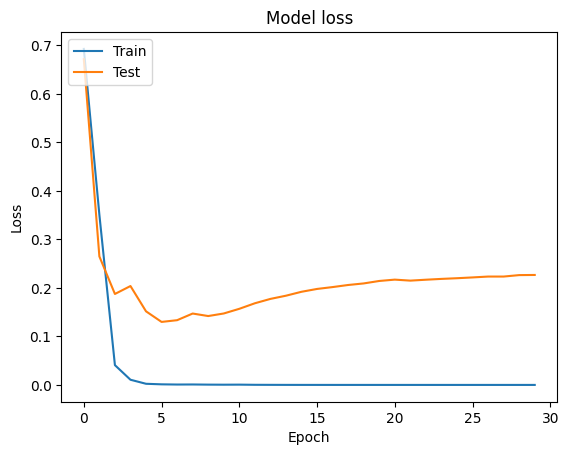

In [54]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('cnn_model_accuracy_plot.png')  # Save before showing
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('cnn_model_loss_plot.png')  # Save before showing
plt.show()


#ANN Model

**Artificial Neural Network (ANN)**

1. **Embedding Layer**:
   - Converts input sequences into dense vectors of fixed size.
   - Parameters: `vocab_size` (vocabulary size), `200` (embedding dimensions), `embedding_matrix` (pre-trained embeddings), `max_length` (input length), `trainable=True` (allowing the embedding to be updated during training).

2. **Flatten Layer**:
   - Converts the 2D matrix from the embedding layer to a 1D vector.

3. **Dense Layers**:
   - `Dense(256, activation='relu')`: Fully connected layer with 256 neurons and ReLU activation.
   - `Dense(128, activation='relu')`: Fully connected layer with 128 neurons and ReLU activation.
   - `Dense(64, activation='relu')`: Fully connected layer with 64 neurons and ReLU activation.

4. **Output Layer**:
   - `Dense(1, activation='sigmoid')`: Output layer with a single neuron and sigmoid activation for binary classification.

5. **Compilation**:
   - `ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])`: Compiles the model with the Adam optimizer, binary cross-entropy loss, and accuracy metric.

In [83]:
# Define the ANN model
ann_model = Sequential()
ann_model.add(Embedding(vocab_size, 200, weights=[embedding_matrix], input_length=max_length, trainable=True))
ann_model.add(Flatten())
ann_model.add(Dense(256, activation='relu'))
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [84]:
ann_history = ann_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/30
93/93 [==============================] - 8s 67ms/step - loss: 0.6945 - accuracy: 0.5203 - val_loss: 0.6573 - val_accuracy: 0.5848
Epoch 2/30
93/93 [==============================] - 3s 32ms/step - loss: 0.5440 - accuracy: 0.7056 - val_loss: 0.3298 - val_accuracy: 0.8589
Epoch 3/30
93/93 [==============================] - 2s 26ms/step - loss: 0.1217 - accuracy: 0.9583 - val_loss: 0.1781 - val_accuracy: 0.9330
Epoch 4/30
93/93 [==============================] - 1s 11ms/step - loss: 0.0324 - accuracy: 0.9895 - val_loss: 0.2127 - val_accuracy: 0.9350
Epoch 5/30
93/93 [==============================] - 1s 14ms/step - loss: 0.0072 - accuracy: 0.9983 - val_loss: 0.2240 - val_accuracy: 0.9391
Epoch 6/30
93/93 [==============================] - 1s 10ms/step - loss: 0.0206 - accuracy: 0.9936 - val_loss: 0.2292 - val_accuracy: 0.9289
Epoch 7/30
93/93 [==============================] - 1s 11ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.2609 - val_accuracy: 0.9330
Epoch 8/30
93

In [85]:
# Evaluate the model on test data
loss, accuracy = ann_model.evaluate(X_test, y_test)

print(f'Accuracy on test data: {accuracy * 100:.2f}%')

31/31 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.9421
Accuracy on test data: 94.21%


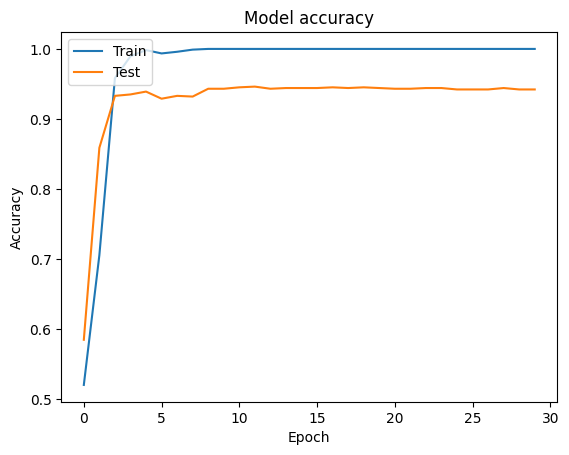

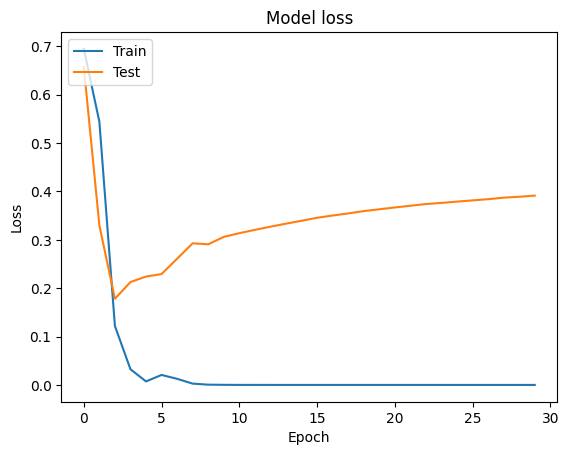

In [86]:
# Plot training & validation accuracy values
plt.plot(ann_history.history['accuracy'])
plt.plot(ann_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('ann_model_accuracy_plot.png')  # Save before showing
plt.show()

# Plot training & validation loss values
plt.plot(ann_history.history['loss'])
plt.plot(ann_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('ann_model_loss_plot.png')  # Save before showing
plt.show()


# RNN Model

In [59]:
# Checking total categories
df['Emotion'].value_counts()

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64

In [60]:
# Changing text to number representation for 'labels'
df['Object'] = df['Emotion'].astype("category").cat.codes

In [61]:
# Checking the new column
df.head()

,Comment,Emotion,word_count,char_count,avg_word_length,Object
0,i seriously hate one subject to death but now ...,fear,15,73,4.866667,1
1,im so full of life i feel appalled,anger,8,34,4.250000,0
2,i sit here to write i start to dig out my feel...,fear,29,131,4.517241,1
3,ive been really angry with r and i feel like a...,joy,19,89,4.684211,2
4,i feel suspicious if there is no one outside l...,fear,16,87,5.437500,1


In [62]:
total_categories = len(df['Object'].unique())
total_categories

3

In [63]:
from sklearn.model_selection import train_test_split

random_seed = 42

df_train, df_test = train_test_split(df, test_size=0.3, random_state=random_seed)


In [64]:
df_train.head()

,Comment,Emotion,word_count,char_count,avg_word_length,Object
2881,i also chat when i feel frustrated with guys b...,anger,17,84,4.941176,0
402,i am if i go back to the hostel for a break i ...,fear,28,111,3.964286,1
4593,i got caught shoplifting a package of gummy bears,fear,9,49,5.444444,1
5057,i do not believe all media content is bad in f...,joy,22,107,4.863636,2
949,i feel like the sequel was ok but overrated no...,joy,19,81,4.263158,2


In [65]:
# Convert sentences into sequences of numbers
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE) # only tikenize the top 3000 words most frequents
tokenizer.fit_on_texts(df_train['Comment'])
sequences_train = tokenizer.texts_to_sequences(df_train['Comment'])
sequences_test = tokenizer.texts_to_sequences(df_test['Comment'])

In [67]:
# Total words found in the dictionary
word2idx = tokenizer.word_index
total_words = len(word2idx)
print(f'total unique words {total_words}')

total unique words 7273


In [68]:
# pad sequences
data_train = pad_sequences(sequences_train)
print(f'Shape of data train tensor: {data_train.shape}')

# get sequence length
length = data_train.shape[1]

Shape of data train tensor: (4155, 60)


In [69]:

data_test = pad_sequences(sequences_test, maxlen=length)
print('Shape of data test tensor:', data_test.shape)


Shape of data test tensor: (1782, 60)


**Recurrent Neural Network(RNN)**

1. **Input Layer**:
   - `Input(shape=(length,))`: Specifies the input shape of the sequences.

2. **Embedding Layer**:
   - `Embedding(total_words+1, D)`: Converts input sequences into dense vectors of size \(D = 50\).

3. **LSTM Layer**:
   - `LSTM(32, return_sequences=True)`: Applies an LSTM with 32 units, returning the full sequence.

4. **Global Max Pooling Layer**:
   - `GlobalMaxPool1D()`: Reduces the sequence by taking the maximum value over each feature.

5. **Dense Layer**:
   - `Dense(total_categories)`: Fully connected layer with a number of neurons equal to the total categories.

6. **Model Definition**:
   - `model = Model(i, x)`: Creates the model with the specified input and output layers.

In [70]:
# Creating the model

# We get to choose embedding dimensionality
D = 50

i = Input(shape=(length ,))
x = Embedding(total_words+1,D)(i)
x = LSTM(32, return_sequences=True)(x)
x = GlobalMaxPool1D()(x)
x = Dense(total_categories)(x)

model = Model(i,x)

In [71]:
# Compile and fit
model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy']
)


In [72]:
rnn = model.fit(
  data_train,
  df_train['Object'],
  epochs=30,
  validation_data=(data_test, df_test['Object'])
)

Epoch 1/30
130/130 [==============================] - 20s 113ms/step - loss: 1.0798 - accuracy: 0.4888 - val_loss: 0.9943 - val_accuracy: 0.5881
Epoch 2/30
130/130 [==============================] - 5s 36ms/step - loss: 0.5296 - accuracy: 0.8606 - val_loss: 0.2620 - val_accuracy: 0.9310
Epoch 3/30
130/130 [==============================] - 3s 25ms/step - loss: 0.1393 - accuracy: 0.9620 - val_loss: 0.1765 - val_accuracy: 0.9349
Epoch 4/30
130/130 [==============================] - 2s 14ms/step - loss: 0.0719 - accuracy: 0.9819 - val_loss: 0.1734 - val_accuracy: 0.9383
Epoch 5/30
130/130 [==============================] - 2s 12ms/step - loss: 0.0466 - accuracy: 0.9875 - val_loss: 0.1792 - val_accuracy: 0.9371
Epoch 6/30
130/130 [==============================] - 2s 12ms/step - loss: 0.0467 - accuracy: 0.9880 - val_loss: 0.1731 - val_accuracy: 0.9388
Epoch 7/30
130/130 [==============================] - 2s 13ms/step - loss: 0.0286 - accuracy: 0.9945 - val_loss: 0.2204 - val_accuracy: 0.92

In [74]:
from sklearn.metrics import classification_report


predictions = model.predict(data_test)
y_pred = np.argmax(predictions, axis=1)


y_true = df_test['Object']


report = classification_report(y_true, y_pred)
print(report)

56/56 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       600
           1       0.96      0.93      0.94       614
           2       0.93      0.96      0.95       568

    accuracy                           0.94      1782
   macro avg       0.94      0.94      0.94      1782
weighted avg       0.94      0.94      0.94      1782



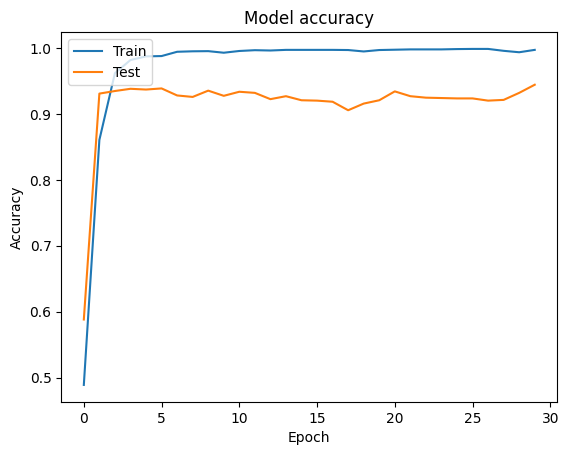

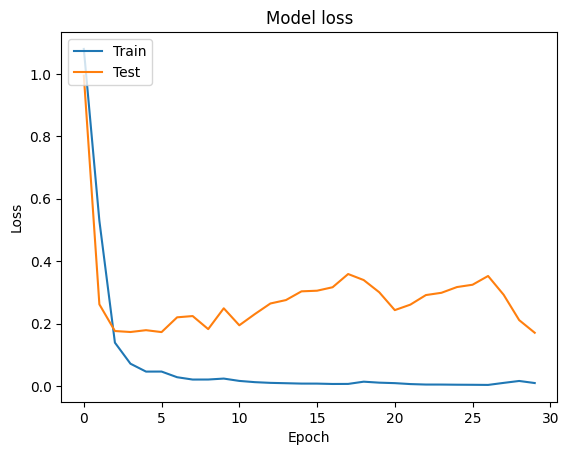

In [75]:
# Plot training & validation accuracy values
plt.plot(rnn.history['accuracy'])
plt.plot(rnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('rnn_model_accuracy_plot.png')  # Save before showing
plt.show()

# Plot training & validation loss values
plt.plot(rnn.history['loss'])
plt.plot(rnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('rnn_model_loss_plot.png')  # Save before showing
plt.show()


# Comparision

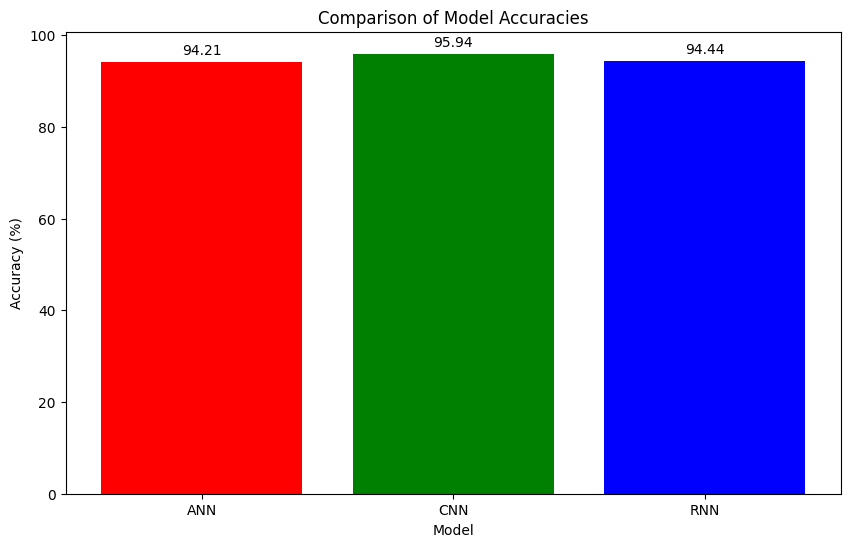

In [92]:
import matplotlib.pyplot as plt

# Data for the bars
data = {'Model': ['ANN', 'CNN', 'RNN'], 'Accuracy': [94.21, 95.94, 94.44]}

# Create the figure
fig = plt.figure(figsize=(10, 6))

# Create the bars
bars = plt.bar(data['Model'], data['Accuracy'], color=['red', 'green', 'blue'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')

# Add data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1,
             round(yval, 2), ha='center', va='bottom')

# Save the plot
plt.savefig('model_comparison.png')

# Show the plot
plt.show()
